# Latar Belakang
Transportasi Jakarta (Transjakarta) telah memulai revolusi transportasi publik dengan memperkenalkan armada bus listrik sejak 2024. Langkah ini tidak hanya bertujuan untuk mengurangi emisi karbon, tetapi juga meningkatkan efisiensi dan kapasitas pelayanan transportasi publik. Pada tahun 2025, penambahan 200 unit bus listrik secara bertahap menjadi bagian dari strategi ambisius untuk mencapai target 407 juta pelanggan Transjakarta dalam satu tahun.

Dengan mengolah data secara tepat, analisis ini diharapkan mampu mengungkap dinamika perjalanan khususnya perbedaan antara transaksi pada jam sibuk dan non-sibuk serta mengidentifikasi 20 koridor yang memiliki trafik penumpang terbanyak pada jam-jam kritis tersebut. Informasi ini sangat penting sebagai dasar pengambilan keputusan strategis oleh pihak manajemen Transjakarta untuk pengoptimalan alokasi armada dan pengelolaan kepadatan penumpang secara keseluruhan.

# Pernyataan Masalah
Sebagai seorang *data analyst*, saya akan mencoba menjawab permasalahan operasional yang dihadapi Transjakarta dengan 3 rumusan masalah berikut:

**1. Jam berapa saja yang menjadi jam sibuk dan non-sibuk?**

**2. Koridor mana saja yang mencatat jumlah penumpang terbanyak pada jam sibuk?**

**3. Bagaimana alokasi bus baru yang dapat dialokasikan kepada Transjakarta berdasarkan temuan analisis?**

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa dataset Transjakarta.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Transjakarta-1.csv')

In [2]:
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita periksa data untuk missing values, outliers, dan duplikasi dari dataset Transjakarta:

**1. transID: Harus unik dan tidak boleh hilang karena merupakan kunci transaksi. Baris dengan transID hilang dihapus karena tidak valid.**

**2. corridorID & corridorName: Saling berkaitan. Jika salah satu hilang, maka akan diisi dengan nilai dari kolom lain. Jika keduanya hilang, akan menggunakan informasi dari variabel tapInStops & tapOutStops untuk mencocokkan koridor yang benar.**

**3. tapInTime: Penting untuk analisis waktu. Missing values diisi dengan median waktu tap-in per koridor setelah konversi ke timestamp untuk menghindari TypeError.**

**4. direction: Kategoris (0 atau 1). Missing values diisi dengan modus (nilai paling umum).**

**5. tapOutTime: Opsional untuk analisis ini. Biarkan kosong atau isi dengan median per koridor jika diperlukan.**

In [ ]:
print("=== Analisis Missing Values ===")
initial_rows = len(df)
print(f"Jumlah baris awal: {initial_rows}")

# Hitung missing values
print("\nJumlah Missing Values per Kolom (Sebelum Penanganan):")
missing_before = df[['transID', 'corridorID', 'corridorName', 'tapInTime', 'direction', 'tapOutTime']].isnull().sum()
print(missing_before)

# Hitung persentase spesifik untuk corridorID dan corridorName
percent_missing_corridorID = (df['corridorID'].isnull().sum() / len(df)) * 100
percent_missing_corridorName = (df['corridorName'].isnull().sum() / len(df)) * 100
print(f"\nPersentase corridorID yang hilang: {percent_missing_corridorID:.2f}%")
print(f"Persentase corridorName yang hilang: {percent_missing_corridorName:.2f}%")

# Hapus baris jika transID hilang
df.dropna(subset=['transID'], inplace=True)
print(f"\nJumlah baris setelah menghapus transID kosong: {len(df)}")

# Tiki-taka khusus untuk koridor "Unknown"
# Buat peta hubungan halte dan koridor dari data lengkap
complete_rows = df.dropna(subset=['corridorID', 'tapInStops', 'tapOutStops'])
stop_to_corridor = {}

for _, row in complete_rows.iterrows():
    tap_in = row['tapInStops']
    tap_out = row['tapOutStops']
    corridor = row['corridorID']
    if pd.notnull(tap_in) and tap_in not in stop_to_corridor:
        stop_to_corridor[tap_in] = corridor
    if pd.notnull(tap_out) and tap_out not in stop_to_corridor:
        stop_to_corridor[tap_out] = corridor

# Fungsi untuk mengisi koridor "Unknown"
def fill_unknown_corridor(row):
    if row['corridorID'] == 'Unknown' or pd.isna(row['corridorID']):
        tap_in = row['tapInStops']
        tap_out = row['tapOutStops']
        if pd.notnull(tap_in) and tap_in in stop_to_corridor:
            return stop_to_corridor[tap_in]
        elif pd.notnull(tap_out) and tap_out in stop_to_corridor:
            return stop_to_corridor[tap_out]
    return row['corridorID']

# Terapkan pengisian untuk corridorID
df['corridorID'] = df.apply(fill_unknown_corridor, axis=1)

# Buat peta hubungan corridorID dan corridorName dari baris yang lengkap
complete_rows = df.dropna(subset=['corridorID', 'corridorName'])
id_to_name = dict(zip(complete_rows['corridorID'], complete_rows['corridorName']))
name_to_id = dict(zip(complete_rows['corridorName'], complete_rows['corridorID']))

# Isi corridorID yang hilang berdasarkan corridorName
df['corridorID'] = df.apply(
    lambda row: name_to_id.get(row['corridorName'], row['corridorID'])
    if pd.isnull(row['corridorID']) and not pd.isnull(row['corridorName'])
    else row['corridorID'],
    axis=1
)

# Isi corridorName yang hilang berdasarkan corridorID
df['corridorName'] = df.apply(
    lambda row: id_to_name.get(row['corridorID'], row['corridorName'])
    if pd.isnull(row['corridorName']) and not pd.isnull(row['corridorID'])
    else row['corridorName'],
    axis=1
)

# Jika keduanya masih hilang, isi dengan 'Unknown'
df['corridorID'].fillna('Unknown', inplace=True)
df['corridorName'].fillna('Unknown', inplace=True)

# Fungsi untuk menghapus koridor "Unknown"
def remove_unknown_corridors(df):
    initial_rows = len(df)
    df = df[(df['corridorID'] != 'Unknown') & (df['corridorName'] != 'Unknown')]
    removed_rows = initial_rows - len(df)
    print(f"\nJumlah baris setelah menghapus koridor 'Unknown': {len(df)}")
    print(f"Jumlah baris yang dihapus karena koridor 'Unknown': {removed_rows}")
    return df

# Menerapkan fungsi penghapusan koridor "Unknown"
df = remove_unknown_corridors(df)

# Konversi tapInTime dan tapOutTime ke datetime
df['tapInTime'] = pd.to_datetime(df['tapInTime'], errors='coerce')
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'], errors='coerce')

# Isi missing tapInTime dengan median per koridor
df['tapInTime_numeric'] = df['tapInTime'].apply(lambda x: x.timestamp() if pd.notnull(x) else pd.NA)
median_tapIn = df.groupby('corridorID')['tapInTime_numeric'].transform('median')
df['tapInTime_numeric'].fillna(median_tapIn, inplace=True)
df['tapInTime'] = pd.to_datetime(df['tapInTime_numeric'], unit='s')

# Isi direction dengan modus
mode_direction = df['direction'].mode()[0]
df['direction'].fillna(mode_direction, inplace=True)

# Biarkan tapOutTime kosong karena tidak menjadi parameter analisis jam sibuk
print("\nJumlah Missing Values per Kolom (Setelah Penanganan):")
missing_after = df[['transID', 'corridorID', 'corridorName', 'tapInTime', 'direction', 'tapOutTime']].isnull().sum()
print(missing_after)

=== Analisis Missing Values ===
Jumlah baris awal: 37900

Jumlah Missing Values per Kolom (Sebelum Penanganan):
transID            0
corridorID      1257
corridorName    1930
tapInTime          0
direction          0
tapOutTime      1344
dtype: int64

Persentase corridorID yang hilang: 3.32%
Persentase corridorName yang hilang: 5.09%

Jumlah baris setelah menghapus transID kosong: 37900

Jumlah baris setelah menghapus koridor 'Unknown': 37888
Jumlah baris yang dihapus karena koridor 'Unknown': 12

Jumlah Missing Values per Kolom (Setelah Penanganan):
transID            0
corridorID         0
corridorName       0
tapInTime          0
direction          0
tapOutTime      1343
dtype: int64


C:\Users\Ridho\AppData\Local\Temp\ipykernel_18684\824568583.py:70: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['corridorID'].fillna('Unknown', inplace=True)
C:\Users\Ridho\AppData\Local\Temp\ipykernel_18684\824568583.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [4]:
# --- 2. Justifikasi Outliers ---
print("\n=== Analisis Outlier ===")
initial_rows_outlier = len(df)
print(f"Jumlah baris sebelum filter outlier: {initial_rows_outlier}")
df = df[(df['tapInTime'].dt.hour >= 5) & (df['tapInTime'].dt.hour <= 22)]
df = df[(df['tapOutTime'].isna()) | ((df['tapOutTime'].dt.hour >= 5) & (df['tapOutTime'].dt.hour <= 22))]
print(f"Jumlah baris setelah filter outlier (waktu operasional 05:00-22:00): {len(df)}")
print(f"Jumlah baris yang dihapus karena outlier: {initial_rows_outlier - len(df)}")


=== Analisis Outlier ===
Jumlah baris sebelum filter outlier: 37888
Jumlah baris setelah filter outlier (waktu operasional 05:00-22:00): 37019
Jumlah baris yang dihapus karena outlier: 869


In [5]:
# --- 3. Justifikasi Duplikat ---
print("\n=== Analisis Data Duplikat ===")
initial_rows_duplicate = len(df)
duplicates = df.duplicated(subset=['transID']).sum()
print(f"Jumlah baris duplikat berdasarkan transID: {duplicates}")
df.drop_duplicates(subset=['transID'], inplace=True)
print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")
print(f"Jumlah baris yang dihapus karena duplikat: {initial_rows_duplicate - len(df)}")


=== Analisis Data Duplikat ===
Jumlah baris duplikat berdasarkan transID: 0
Jumlah baris setelah menghapus duplikat: 37019
Jumlah baris yang dihapus karena duplikat: 0


## Data Analysis and Visualization

Kedua, setelah pengecekan anomali pada data dilakukan kita akan melakukan analisa pola perjalanan dan visualisasi data.

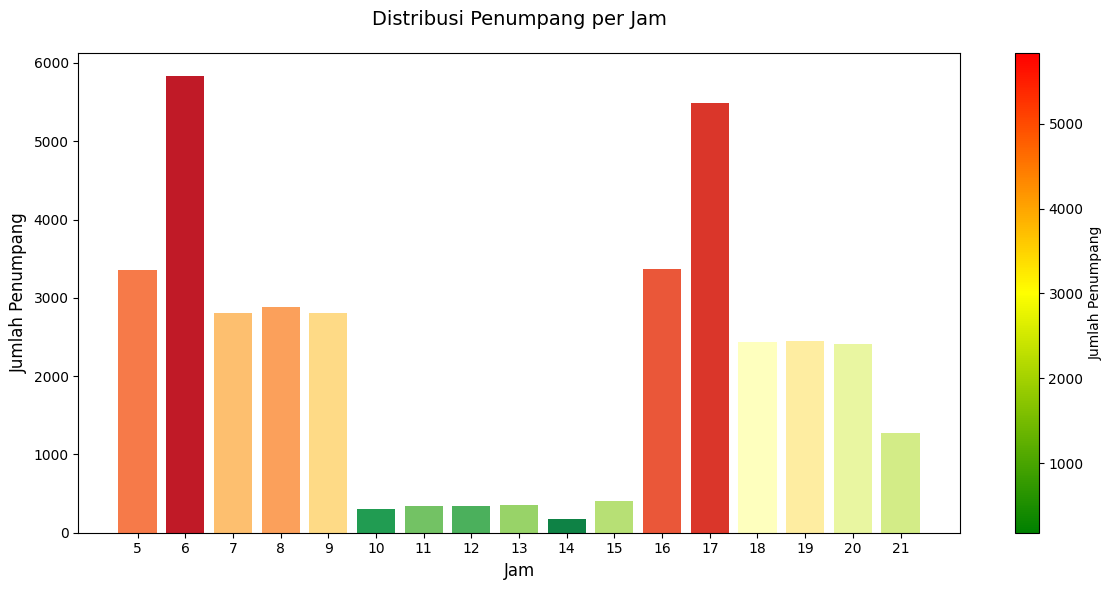


=== Hasil Analisis ===
Distribusi Penumpang per Jam:
hour
5     3357
6     5838
7     2811
8     2880
9     2806
10     298
11     339
12     337
13     348
14     179
15     407
16    3363
17    5488
18    2438
19    2454
20    2405
21    1271
Name: count, dtype: int64


In [6]:
# --- Analisis Pola Perjalanan ---

import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Konversi tapInTime ke format datetime dan ekstrak jam
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['hour'] = df['tapInTime'].dt.hour

# Hitung jumlah penumpang per jam
hourly_counts = df['hour'].value_counts().sort_index()

# Buat palet warna kustom: merah untuk nilai tertinggi, hijau untuk nilai terendah
# Definisikan colormap kustom dari merah ke hijau
colors = sns.color_palette("RdYlGn", n_colors=len(hourly_counts))

# Pastikan pemetaan warna berdasarkan nilai
# Urutkan warna berdasarkan jumlah penumpang (dari tertinggi ke terendah)
sorted_indices = np.argsort(hourly_counts.values)[::-1]  # Indeks dari nilai tertinggi ke terendah
sorted_colors = [colors[i] for i in np.argsort(sorted_indices)]  # Urutkan warna sesuai dengan nilai

# Visualisasi distribusi penumpang per jam
plt.figure(figsize=(12, 6))
bars = plt.bar(hourly_counts.index, hourly_counts.values, color=sorted_colors)
plt.title('Distribusi Penumpang per Jam', fontsize=14, pad=20)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Jumlah Penumpang', fontsize=12)
plt.xticks(range(5, 22), fontsize=10)
plt.tight_layout()

# Tambahkan colorbar untuk menunjukkan skala warna
#Colormap kustom untuk colorbar
cmap = LinearSegmentedColormap.from_list("custom", ["green", "yellow", "red"])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=hourly_counts.min(), vmax=hourly_counts.max()))
plt.colorbar(sm, label='Jumlah Penumpang', ax=plt.gca())

# Simpan plot
plt.savefig('penumpang_per_jam_color_gradient.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Tampilkan hasil
print("\n=== Hasil Analisis ===")
print("Distribusi Penumpang per Jam:")
print(hourly_counts)

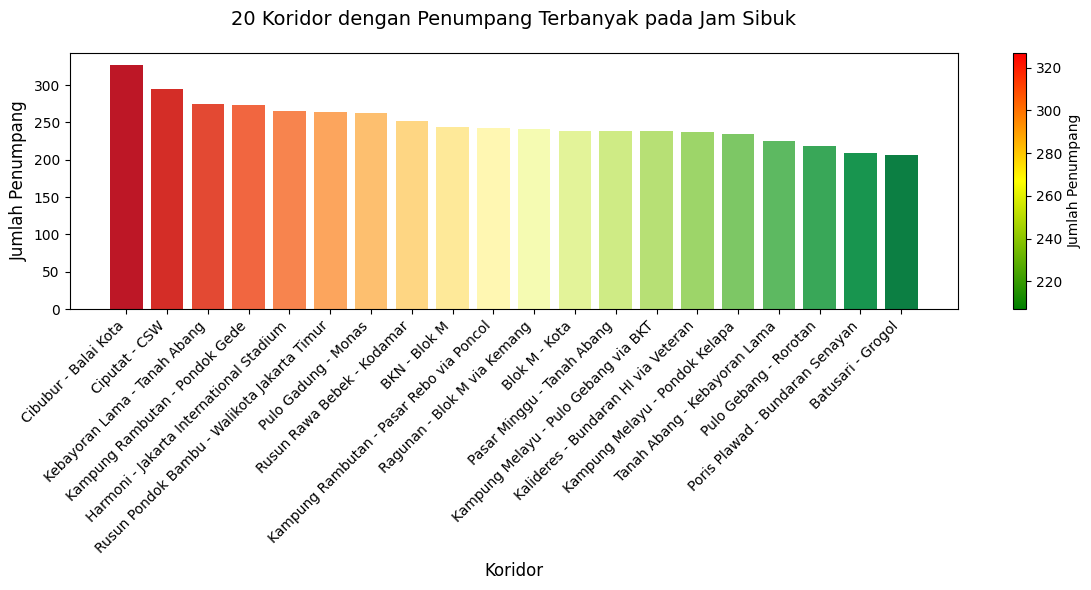


=== Hasil Analisis: 20 Koridor Tersibuk pada Jam Sibuk ===
corridorName
Cibubur - Balai Kota                           327
Ciputat - CSW                                  295
Kebayoran Lama - Tanah Abang                   275
Kampung Rambutan - Pondok Gede                 274
Harmoni - Jakarta International Stadium        265
Rusun Pondok Bambu - Walikota Jakarta Timur    264
Pulo Gadung - Monas                            263
Rusun Rawa Bebek - Kodamar                     252
BKN - Blok M                                   244
Kampung Rambutan - Pasar Rebo via Poncol       242
Ragunan - Blok M via Kemang                    241
Blok M - Kota                                  238
Pasar Minggu - Tanah Abang                     238
Kampung Melayu - Pulo Gebang via BKT           238
Kalideres - Bundaran HI via Veteran            237
Kampung Melayu - Pondok Kelapa                 235
Tanah Abang - Kebayoran Lama                   225
Pulo Gebang - Rorotan                          219
Poris Pla

In [7]:
# Konversi tapInTime ke format datetime dan ekstrak jam
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['hour'] = df['tapInTime'].dt.hour

# Tentukan jam sibuk (06:00–09:00 dan 16:00–19:00)
df['is_peak'] = df['hour'].apply(lambda x: 1 if (6 <= x <= 9 or 16 <= x <= 19) else 0)

# --- Visualisasi 1: 20 Koridor Tersibuk pada Jam Sibuk ---
# Filter data untuk jam sibuk
peak_df = df[df['is_peak'] == 1]
corridor_counts = peak_df['corridorName'].value_counts().head(20)

# Buat palet warna kustom: merah untuk nilai tertinggi, hijau untuk nilai terendah
colors = sns.color_palette("RdYlGn", n_colors=len(corridor_counts))

# Visualisasi 20 koridor tersibuk
plt.figure(figsize=(12, 6))
bars = plt.bar(corridor_counts.index, corridor_counts.values, color=colors)
plt.title('20 Koridor dengan Penumpang Terbanyak pada Jam Sibuk', fontsize=14, pad=20)
plt.xlabel('Koridor', fontsize=12)
plt.ylabel('Jumlah Penumpang', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Tambahkan colorbar
cmap = LinearSegmentedColormap.from_list("custom", ["green", "yellow", "red"])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=corridor_counts.min(), vmax=corridor_counts.max()))
plt.colorbar(sm, label='Jumlah Penumpang', ax=plt.gca())

# Simpan plot
plt.savefig('koridor_paling_sibuk_color_gradient.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# Tampilkan hasil
print("\n=== Hasil Analisis: 20 Koridor Tersibuk pada Jam Sibuk ===")
print(corridor_counts)

In [10]:
output_file = "Transjakarta_cleaned_data.csv"
df.to_csv(output_file, index=False)

print(f"The cleansed data has been successfully saved to {output_file}")

The cleansed data has been successfully saved to Transjakarta_cleaned_data.csv
